In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/employee-dataset/Employee.csv


# **Import all Essential Libraries**

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
from sklearn import svm

# Importing CSV File

In [4]:
data = pd.read_csv("Employee - Employee.csv.csv")
data.head()

,Education,JoiningYear,City,PaymentTier,Age,Gender,EverBenched,ExperienceInCurrentDomain,LeaveOrNot
0,Bachelors,2017,Bangalore,3,34,Male,No,0,0
1,Bachelors,2013,Pune,1,28,Female,No,3,1
2,Bachelors,2014,New Delhi,3,38,Female,No,2,0
3,Masters,2016,Bangalore,3,27,Male,No,5,1
4,Masters,2017,Pune,3,24,Male,Yes,2,1


## describe your file

In [6]:
data.describe()

,JoiningYear,PaymentTier,Age,ExperienceInCurrentDomain,LeaveOrNot
count,4653.000000,4653.000000,4653.000000,4653.000000,4653.000000
mean,2015.062970,2.698259,29.393295,2.905652,0.343864
std,1.863377,0.561435,4.826087,1.558240,0.475047
min,2012.000000,1.000000,22.000000,0.000000,0.000000
25%,2013.000000,3.000000,26.000000,2.000000,0.000000
50%,2015.000000,3.000000,28.000000,3.000000,0.000000
75%,2017.000000,3.000000,32.000000,4.000000,1.000000
max,2018.000000,3.000000,41.000000,7.000000,1.000000


**Here we check the datatypes of each column or each entity, for better understand of what a column depreives 
Moreover, the data types give us the better understanding to formulate entities.**

**It is a good practice to check your data before any visualization or training for any null values.**

In [8]:
data.isnull().sum()

Education                    0
JoiningYear                  0
City                         0
PaymentTier                  0
Age                          0
Gender                       0
EverBenched                  0
ExperienceInCurrentDomain    0
LeaveOrNot                   0
dtype: int64

**This gives the some last rows of dataset**

In [9]:
data.tail()

,Education,JoiningYear,City,PaymentTier,Age,Gender,EverBenched,ExperienceInCurrentDomain,LeaveOrNot
4648,Bachelors,2013,Bangalore,3,26,Female,No,4,0
4649,Masters,2013,Pune,2,37,Male,No,2,1
4650,Masters,2018,New Delhi,3,27,Male,No,5,1
4651,Bachelors,2012,Bangalore,3,30,Male,Yes,2,0
4652,Bachelors,2015,Bangalore,3,33,Male,Yes,4,0


**This will return all columns name**

In [17]:
data.columns


Index(['Education', 'JoiningYear', 'City', 'PaymentTier', 'Age', 'Gender',
       'EverBenched', 'ExperienceInCurrentDomain', 'LeaveOrNot'],
      dtype='object')

**Tells datatype of each column**

In [16]:
data.dtypes

Education                    object
JoiningYear                   int64
City                         object
PaymentTier                   int64
Age                           int64
Gender                       object
EverBenched                  object
ExperienceInCurrentDomain     int64
LeaveOrNot                    int64
dtype: object

**Provides number of unique value of all columns**

In [18]:
data.nunique()

Education                     3
JoiningYear                   7
City                          3
PaymentTier                   3
Age                          20
Gender                        2
EverBenched                   2
ExperienceInCurrentDomain     8
LeaveOrNot                    2
dtype: int64

# To check Is there any null values in the dataset

In [19]:
data.isnull().sum()

Education                    0
JoiningYear                  0
City                         0
PaymentTier                  0
Age                          0
Gender                       0
EverBenched                  0
ExperienceInCurrentDomain    0
LeaveOrNot                   0
dtype: int64

# HeatMap to check nullvalues

<Axes: >

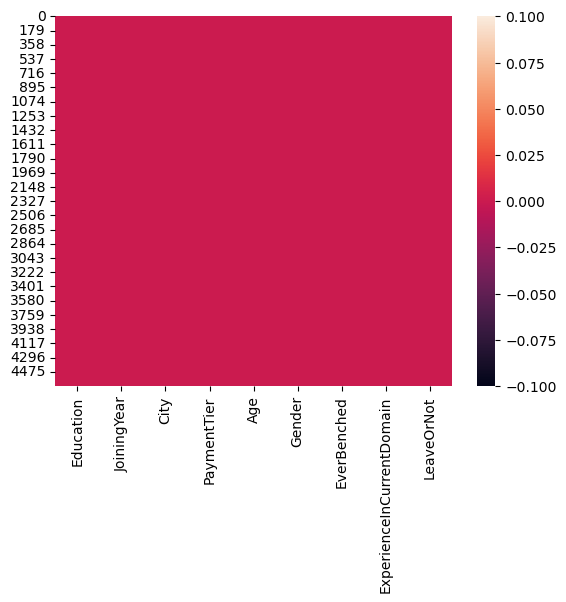

In [26]:
sns.heatmap(data.isnull())

**Lets check the shape of the data**

In [28]:
data.shape

(4653, 9)

# Exploratory Data Analysis


**Now we check how many unique degrees people have in the dataset.**

In [38]:
# Education Level =>

data["Education"]

0       Bachelors
1       Bachelors
2       Bachelors
3         Masters
4         Masters
          ...    
4648    Bachelors
4649      Masters
4650      Masters
4651    Bachelors
4652    Bachelors
Name: Education, Length: 4653, dtype: object

# give count fot unique degree

In [53]:
part = data["Education"].nunique()
part

3

* **Most of the Employee have "Bachelors" degree**


* **Very less Employee have "PHD" degree**

# Now lets visualize the number of different degree holder in the form of a Bar Graph
 

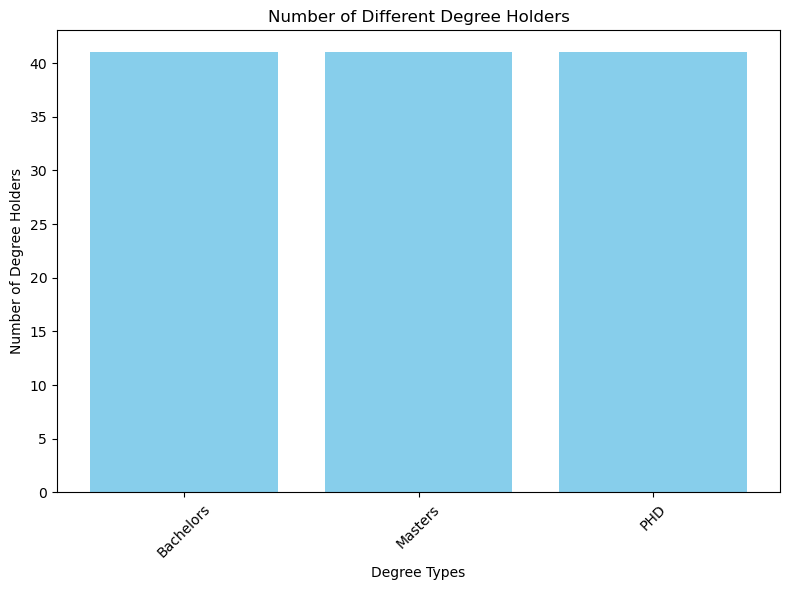

In [57]:
plt.figure(figsize=(8, 6))
plt.bar(data["Education"],data["Age"], color='skyblue')
plt.xlabel('Degree Types')
plt.ylabel('Number of Degree Holders')
plt.title('Number of Different Degree Holders')
plt.xticks(rotation=45)  
plt.tight_layout()


# Now lets visualize the percentage of different degree holder in the form of a pie-chart


In [76]:
total = data["Education"].sum(counts)
percentages = [(3 / total) * 100 ]

plt.figure(figsize=(8, 6))
plt.pie(data["Education"], labels="Education", autopct='%1.1f%%')


NameError: name 'counts' is not defined

**Now we check how many unique cities people have in the dataset.**


In [17]:
# City =>


array(['Bangalore', 'Pune', 'New Delhi'], dtype=object)

,City,count
0,Bangalore,2228
1,Pune,1268
2,New Delhi,1157


**Most of employees are from bangalore**

# Now lets visualize the number of Employees from Different cities in the form of a Bar Graph


<BarContainer object of 3 artists>

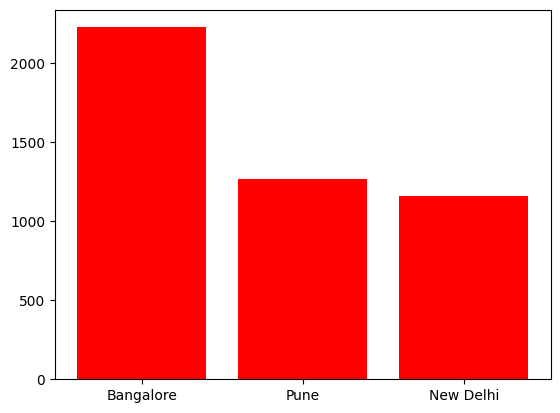

# Now lets visualize the percentage of Employees from Different cities in the form of a Pie Chart


Text(0.5, 1.0, 'Employee from different City')

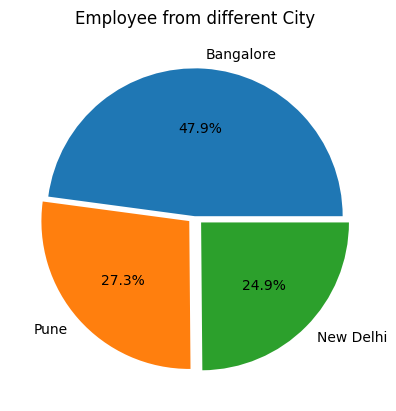

**Types in Payment Tier**

In [21]:
# Payment Tier


array([3, 1, 2])

In [22]:
pay_tier=df['PaymentTier'].value_counts()
pay_tier

,PaymentTier,count
0,3,3492
1,2,918
2,1,243


**Most of the Employees are from PaymentTier -> 3**



# Now lets visualize the number of Employees from Different Payment tier in the form of a Bar Graph


# Now lets visualize the percentage of Employees from Different Payment tier in the form of a Pie Chart


Text(0.5, 1.0, 'Employees from different PaymentTier')

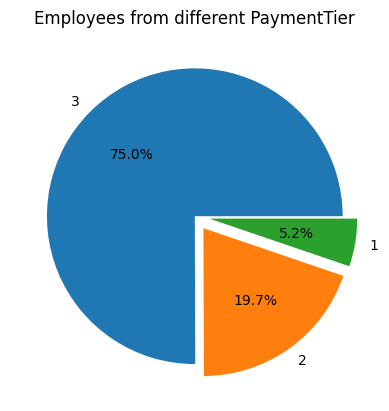

**Now we check how many unique age number of people have in the dataset.**
​


In [29]:
# Age =>
df['Age'].unique()

array([34, 28, 38, 27, 24, 22, 23, 37, 32, 39, 29, 30, 36, 31, 25, 26, 40,
       35, 33, 41])

# count the age values

# Bar Graph represents Different Age group of employees

<BarContainer object of 20 artists>

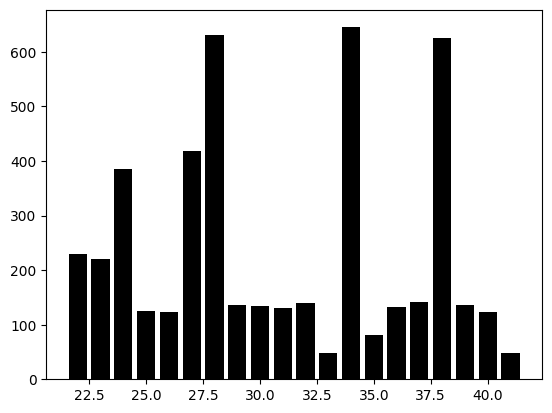

# Pie Chart represents the age percentage of employees

Text(0.5, 1.0, 'Ratio Of Different Ages of Employees')

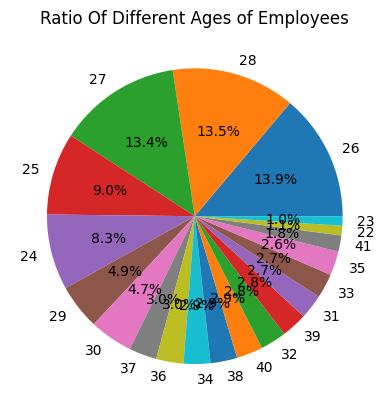

**Gender**

In [33]:
# Gender=>
df['Gender'].unique()

array(['Male', 'Female'], dtype=object)

In [34]:
gender=df['Gender'].value_counts().reset_index()
gender

,Gender,count
0,Male,2778
1,Female,1875


**There are around 1000 more male employees in the dataset**



# Gender Ratio of Employees in the form of Bar Graph

<BarContainer object of 2 artists>

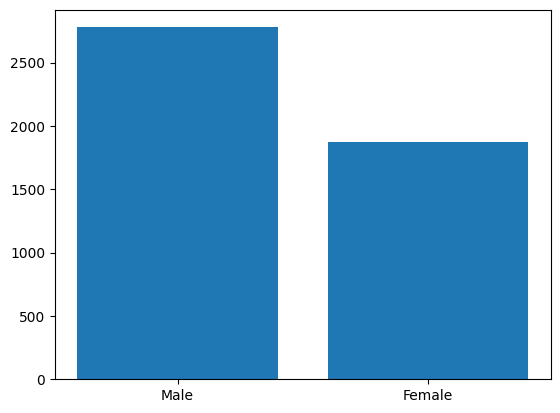

# Pie Chart represents gender ratio of employees

Text(0.5, 1.0, 'Gender Ratio')

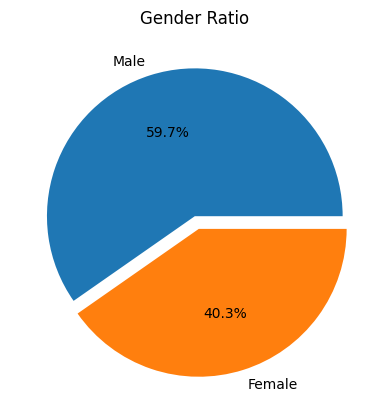

**Experience**

##Find the unique experiance

array([0, 3, 2, 5, 1, 4, 7, 6])

##Find the unique experiance count

,ExperienceInCurrentDomain,count
0,2,1087
1,4,931
2,5,919
3,3,786
4,1,558
5,0,355
6,7,9
7,6,8


# Bar Graph represents the experience Of Current Domain of Employees

<BarContainer object of 8 artists>

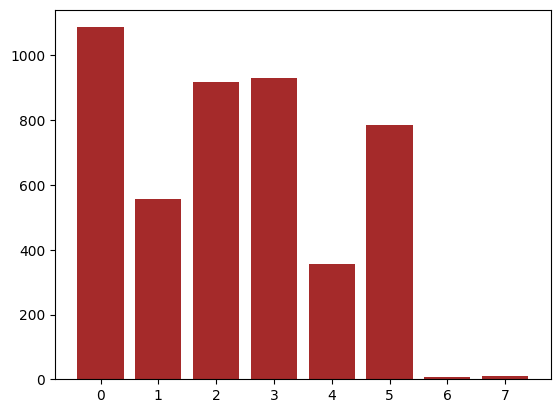

# Pie Chart represents the percentage experience Of Current Domain of Employees

Text(0.5, 1.0, 'Experience Ratio In Current Domain')

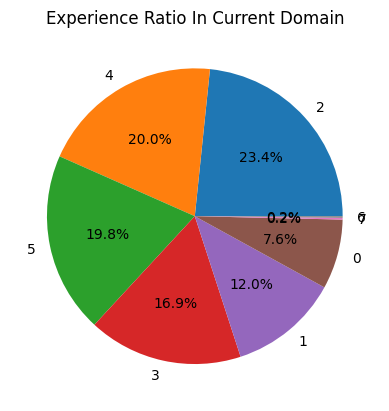